In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle


2023-05-05 19:34:39.966882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 19:34:40.217607: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 19:34:40.221395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 19:34:41.908307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [3]:
# Define the model architecture
model = KNeighborsClassifier(n_neighbors=8)

# Train the model
_ = model.fit(X_train, y_train)

Test accuracy: 0.924
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       158
           2       0.94      0.89      0.91       157
           3       0.91      0.95      0.93       164
           4       0.93      0.93      0.93       160
           5       0.94      0.89      0.91       150
           6       1.00      0.98      0.99       164
           7       0.87      0.92      0.89       167

    accuracy                           0.92      1120
   macro avg       0.93      0.92      0.92      1120
weighted avg       0.93      0.92      0.92      1120



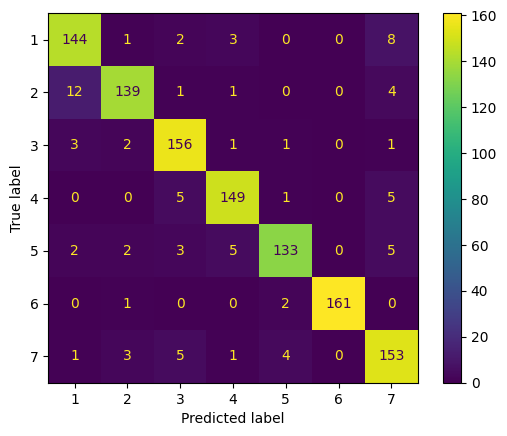

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

# Generating the confusion matrix for the model
conf_mat = np.array(confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [5]:
accuracies = []

for n_neighbors in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies += [n_neighbors, accuracy],

accuracies = np.array(accuracies)


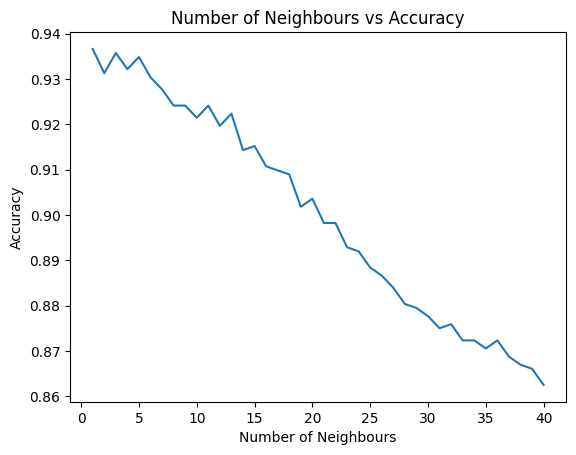

In [6]:
plt.title("Number of Neighbours vs Accuracy")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.plot(*accuracies.T, label="Accuracy")
plt.show()


In [24]:
model_name = "k_nearest_v1"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))